In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [5, 5]

In [3]:
batch_size = 300

In [4]:
np.random.seed(66)

In [5]:
# using 2nd derivative to approximate smoothness. straight line has the best 0 value.
def kinetic_energy(subpath, dt=0.01):
    grad_diff = (subpath[:, :99, :] - subpath[:, 1:, :]) / dt
    smooth_metric = np.mean(np.square(grad_diff), axis=(0, 1))
    return print(f'KE x: {smooth_metric[0]:.1f} y: {smooth_metric[1]:.1f}')

In [6]:
# using 2nd derivative to approximate smoothness. straight line has the best 0 value.
def smooth_metric(subpath, dt=0.01):
    grad_diff = (subpath[:, :99, :] - subpath[:, 1:, :]) / dt
    smooth_diff = (grad_diff[:, :98, :] - grad_diff[:, 1:, :]) / dt
    smooth_metric = np.mean(np.abs(smooth_diff), axis=(0, 1))
    return print(f'Smoothness x: {smooth_metric[0]:.1f} y: {smooth_metric[1]:.1f}')

In [7]:
def plot_traj(path, shape='spiral', save_name=None, report_smoothness=True):
    rand_idx = np.random.randint(0, high=3000, size=batch_size)
    sub_path = path[rand_idx, :, :]
    
    for i in range(batch_size):
        plt.plot(sub_path[i, :, 0], sub_path[i, :, 1], linewidth=2, alpha=0.3)
    plt.plot(sub_path[:, 0, 0], sub_path[:, 0, 1], 'o', markersize=3)
    plt.plot(sub_path[:, -1, 0], sub_path[:, -1, 1], 'o', markersize=3)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    if shape == 'spiral':
        plt.xlim([-3.3, 4.2])
        plt.ylim([-27,36])
        plt.xticks(np.arange(-3, 4, 2.0))
        plt.yticks(np.arange(-25, 35, 15.0))
        
    else:
        plt.xlim([-40, 40])
        plt.ylim([-7,7])
        plt.xticks(np.arange(-40, 40, 20.0))
        plt.yticks(np.arange(-7, 7, 3.0))

    if save_name != None:
        plt.savefig(f"./figures/{save_name}.png", dpi=100, bbox_inches='tight')
    plt.show()
    if report_smoothness:
        smooth_metric(sub_path)
        kinetic_energy(sub_path)

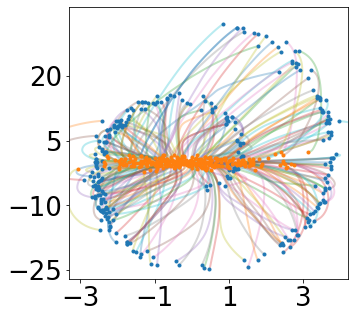

Smoothness x: 5.4 y: 32.0
KE x: 3.8 y: 202.8


In [8]:
path_vsdm = np.load('./results/spiral_8y_vsdm_10/stage100-backward-ode.npy')
plot_traj(path_vsdm, save_name='spiral_8y_vsdm_10')